### IDEA

In financial markets and in the real world there are time series which are cointegrated. In general terms if  two time series are ‘cointegrated’ then it means, that the two time-series move together and if  at all there is a deviation from this movement, it is either temporary or can be attributed to a  stray event, and one can expect the two time-series to revert to its regular orbit i.e. converge  and move together again. This type of time series is exactly what we want to find in financial  markets.  


So, in this project I will try and find those cointegrated relationships in banking stocks


So, to try to find a cointegrated time series we use linear regression. So, what linear regression  does in basic terms comes with the relationship between Independent variable X and dependent  variable Y. That relationship is described in terms of slope. so, slope captures how much Y  would change with change in X. 


Once we get a relationship then we can use that relationship to predict the value of Y from X.  But more often linear regression has a hard time predicting dependent variables properly. so,  we are not going to use linear regression predictions to directly make trades. 


Instead of focusing on predictions from the linear regression model we are going to focus on  errors made by the model also known as residuals. so, we will check whether the residuals of a  model are stationary or not meaning the residuals mean and variance is in tight range and  autocorrelation of residual is close to 0. This means a residual time series is stationary. 


Stationarity of residuals confirms that two stocks are cointegrated. they move closely together  and if at all some deviation happens that's temporary, they will converge back. That’s what a  cointegrated series is.


In [1]:
import pandas as pd 
import numpy as np 
import datetime 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import nsepy 
import os
%matplotlib inline 
plt.style.use('ggplot')

In [2]:
#data folder path 
path = 'C:\\Users\\sahil\\Documents\\learning\\springborad projects\\capstone_project_1\\data'

## preparing data 

In [3]:
resample_freq = "60T"
year = "2014"

x_name = "HDFC.csv"
y_name = "HDFCBANK.csv"

x = pd.read_csv(path + "\\" + x_name,index_col = 0,parse_dates=True)
y = pd.read_csv(path + "\\" + y_name,index_col = 0,parse_dates=True)

x = x.Close.to_frame()
y = y.Close.to_frame()

x.columns = ["HDFC"]
y.columns = ["HDFCBANK"]

df = pd.concat([x,y],axis = 1)

df.dropna(inplace=True)
df.sort_index(inplace=True)

df = df.loc[year].copy()

df = df.resample(resample_freq).last()
df.dropna(inplace=True)

In [4]:
df.head()

,HDFC,HDFCBANK
2014-01-01 09:00:00,797.25,332.875
2014-01-01 10:00:00,797.35,334.025
2014-01-01 11:00:00,791.05,334.025
2014-01-01 12:00:00,792.50,333.200
2014-01-01 13:00:00,793.00,332.475


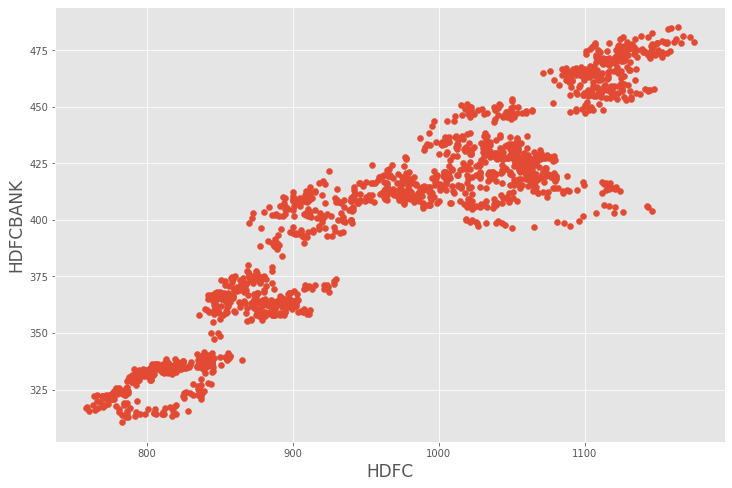

In [5]:
plt.figure(figsize = (12, 8))
plt.scatter(df.HDFC, df.HDFCBANK)
plt.xlabel("HDFC", fontsize = 17)
plt.ylabel("HDFCBANK", fontsize = 17)
plt.show()


In [6]:
# getting X and Y ie independent variable and dependent variable
x = df.HDFC
y = df.HDFCBANK

In [7]:
## correlation 
np.corrcoef(x,y)

array([[1.        , 0.94227284],
       [0.94227284, 1.        ]])

In [8]:
# training the model
model = sm.OLS(y,x)
results = model.fit()
pred = results.predict(x)

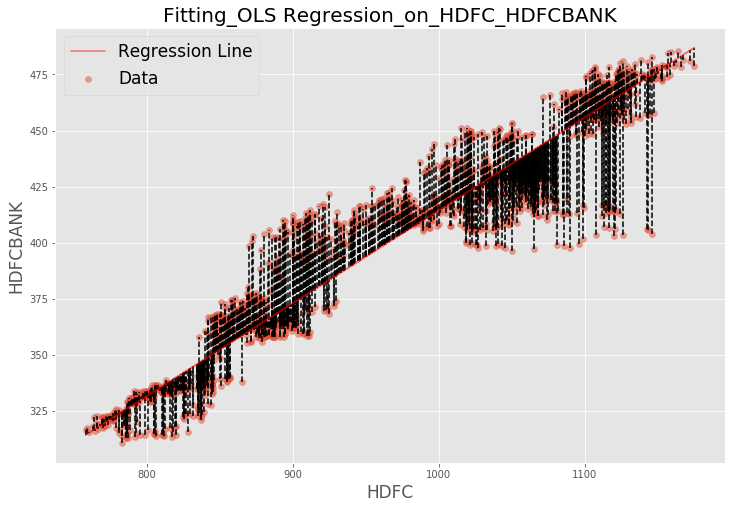

In [9]:
plt.figure(figsize = (12, 8))
plt.scatter(x = x, y = y, alpha = 0.5, label = "Data")
plt.plot(x, pred, c = "r", alpha = 0.5, label = "Regression Line")
for i in range(len(y)):
    plt.vlines(x[i], ymin = min(pred[i], y[i]), ymax = max(pred[i], y[i]), linestyles = "dashed")
plt.xlabel("HDFC", fontsize = 17)
plt.ylabel("HDFCBANK", fontsize = 17)
plt.title("Fitting_OLS Regression_on_HDFC_HDFCBANK", fontsize = 20)
plt.legend(fontsize = 17)
plt.show()


### Normalized plot of HDFC and HDFC BANK close prices

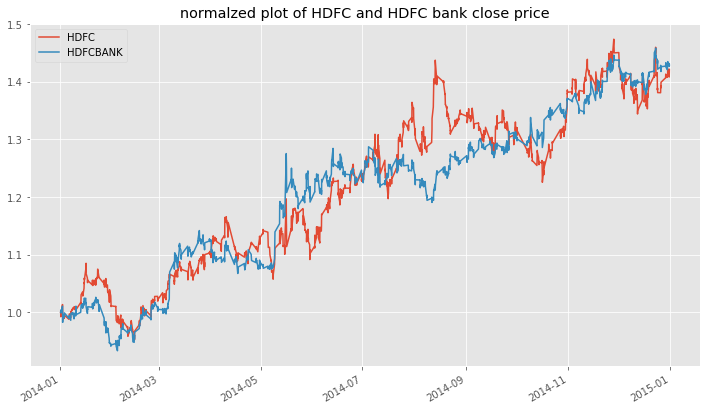

In [10]:
(df/df.iloc[0]).plot(figsize = (12,7))
plt.title("normalzed plot of HDFC and HDFC bank close price")
plt.show()


In [11]:
# spread = actual - predicted values 
spread = (y - pred)

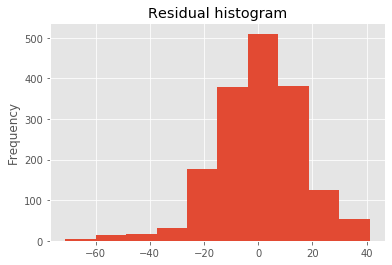

In [12]:
spread.plot(kind = "hist")
plt.title("Residual histogram")
plt.savefig("HDFC_and_HDFCBANK_residual_hist.png")
plt.show()


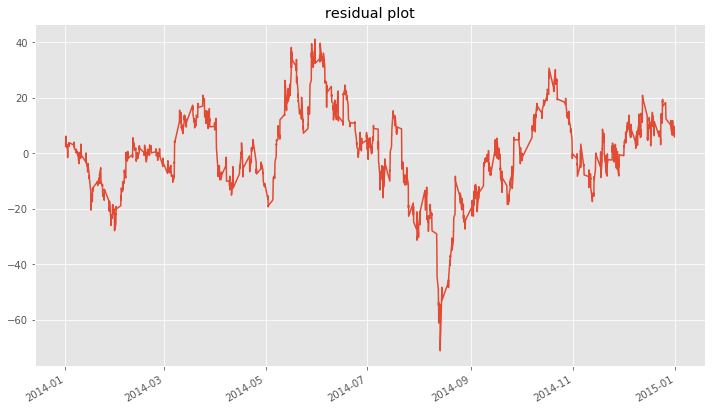

In [13]:
spread.plot(figsize = (12,7))
plt.title("residual plot")
plt.show()


 ### Cointegration Test
 * The residuals obtained from the regression should be `stationary`. If they are `stationary`, then we can conclude that the two stocks are `co-integrated`
 * If the stocks are `cointegrated`, then they move together and if at all there is a deviation from this movement, it is either temporary or can be attributed to a stray event, and one can expect the two time series to revert to its regular orbit meaning the converge back this is we exactly what we want in pair trading 
 * Stationarity of a series can be evaluated by running an `ADF test`
 
 ### Assumptions of a stationary time series:
* The mean of the series should be same or within a tight range 
* The standard deviation of the series should be within a range 
* There should be very less autocorrelation in the time series in simple words, say value n  should not be correlated with value before it. which states that time series is not trending  
 

### ADF-test
To check whether the series is stationary or not we run an ADF test. ADF test automatically checks the  conditions stated above.we get t-stat value as output from an ADF test and if t-stat value is  lower than the critical value we can conclude that the series is stationary. 

Null and alternative hypothesis in ADF test  
*  H0 series is trending  
*  H1 series is stationary  

critical values for ADF test are: 
*  1%: -3.4342184244873657 (99% percent confidence we reject H0) 
*  5%: -2.8632486915862247 (95% percent confidence we reject H0) 
*  10%: -2.567679662838086 (90% percent confidence we reject H0) 

`ADF test t-stat` value for above `HDF` and `HDFC BANK` residuals time series is : `-3.0176525849531557 `

So `-3.01` is lower than `-2.86` so with 95% confidence we can say series is stationary

One thing to keep in mind: Residuals from a stock pair might not always be stationary in the real world. More often than not we will find stationarity in patches.  
Meaning pairs which are cointegrated today might lose cointegration after some time.
 So, for that we will use rolling ADF t-stat values. so we can access at every data point   whether the past n values of residuals is stationary or no

In [14]:
adf = adfuller(spread, maxlag = 1)

In [15]:
# Critical values
adf[4]

{'1%': -3.4342184244873657,
 '5%': -2.8632486915862247,
 '10%': -2.567679662838086}

In [16]:
# ADF Test statistic
adf[0]

-3.0176525849531557

### calculating rolling +2 std and -2std and rolling mean on the spread
* if spread is stationary as it is in the above case we can see HDFC and HDFCBANK spread is stationary 
* wich means spread is `mean reverting` and so intuitively when stocks move way from each other they are likely to converge back
* so this arises a trading oppurtunity 
   * so whenever spread deviates below -2 std we buy spread 
   * when spread goes beyond +2 std we can short the spread  

In [17]:
look_back_period = 300
deviations = (2)

spread = spread.to_frame()
spread.columns = ["spread"]

spread["rolling_std"] = spread.spread.rolling(look_back_period).std()
spread["rolling_mean"] = spread.spread.rolling(look_back_period).mean()

spread["upper_band"] = spread.rolling_mean + (spread.rolling_std * 2)
spread["lower_band"] = spread.rolling_mean - (spread.rolling_std * 2)

spread.dropna(inplace=True)

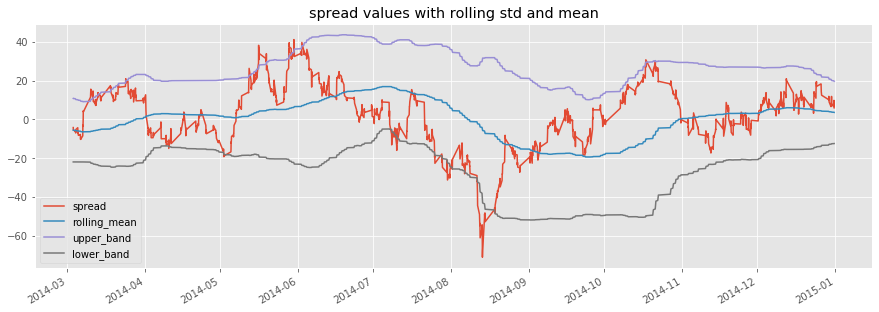

In [18]:
spread[['spread','rolling_mean', 'upper_band', 'lower_band']].plot(figsize = (15,5))
plt.title("spread values with rolling std and mean")
plt.show()
